In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
windows = pd.read_parquet('output/embedding/windows.parquet')
classification_model = pd.read_parquet('output/classification/model.parquet')
windows['pred_Region'] = classification_model.pred_Region.values
region_renaming = {
    "intergenic": "Intergenic",
    "intron": "Intron",
    "ncRNA_gene": "ncRNA",
    "five_prime_UTR": "5' UTR",
    "three_prime_UTR": "3' UTR",
}
windows.Region = windows.Region.replace(region_renaming)
windows.pred_Region = windows.pred_Region.replace(region_renaming)
windows

,chrom,start,end,strand,center_start,center_end,Region,pred_Region
0,1,0,512,+,206,306,Intergenic,Intron
1,1,100,612,+,306,406,Intergenic,3' UTR
2,1,200,712,+,406,506,Intergenic,3' UTR
3,1,300,812,+,506,606,Intergenic,CDS
4,1,400,912,+,606,706,Intergenic,ncRNA
...,...,...,...,...,...,...,...,...
818088,5,26974534,26975046,+,26974740,26974840,Intergenic,Intergenic
818089,5,26974634,26975146,+,26974840,26974940,Intergenic,Intergenic
818090,5,26974734,26975246,+,26974940,26975040,Intergenic,Intergenic
818091,5,26974834,26975346,+,26975040,26975140,Intergenic,Intergenic


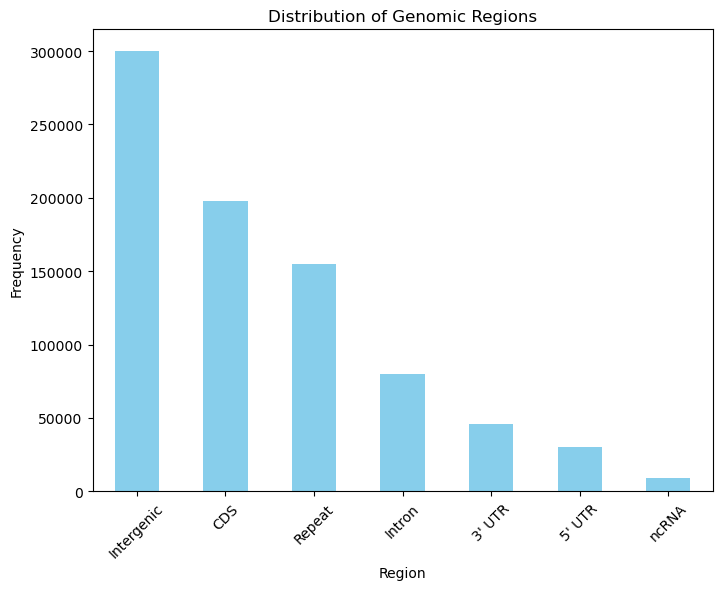

In [ ]:
value_counts = windows['Region'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Genomic Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')

plt.xticks(rotation=45);

plt.show()
plt.savefig(f"output/figures/bar_plot.png", bbox_inches='tight')

In [7]:
regions = windows.Region.value_counts().index.values

# Make sure Repeat goes last
if "Repeat" in regions:
    regions = regions[regions!="Repeat"].tolist() + ["Repeat"]
regions

['Intergenic', 'CDS', 'Intron', "3' UTR", "5' UTR", 'ncRNA', 'Repeat']

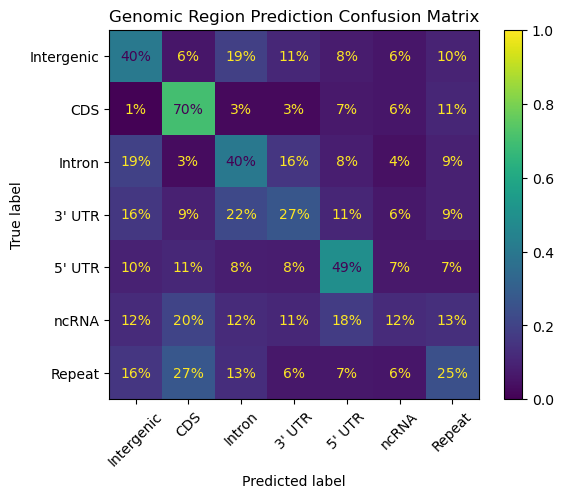

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    windows.Region, windows.pred_Region, normalize='true', labels=regions,
    values_format=".0%", im_kw=dict(vmin=0, vmax=1),
)
plt.title('Genomic Region Prediction Confusion Matrix')
plt.xticks(rotation=45);
plt.savefig(f"output/figures/conf_matrix.svg", bbox_inches="tight")
plt.savefig(f"output/figures/conf_matrix.png", bbox_inches='tight')